## Import Package

In [1]:
# Package to load
import numpy as np # linear algebra
import pandas as pd # Digunakan untuk manipulasi, analisis, dan pengelolaan data dalam bentuk tabel (dataframe) secara efisien.
import matplotlib.pyplot as plt # igunakan untuk membuat visualisasi data seperti grafik, diagram, dan plot lainnya.
import seaborn as sns


#All necessary plotly libraries
import plotly as plotly
import plotly.io as plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# stats tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import itertools
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import acorr_ljungbox


import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

## Import Dataset Harga Saham BNI

In [7]:
df = pd.read_csv("D:\KULIAH S2 IPB\SEMESTER 2\ANALISIS DERET WAKTU (ADW)\PRAKTIKUM\Analisis-Time-Series-Public\KULIAH\Pert6_Tugas2_Kelompok_Model Terbaik\harga telur semarang.csv")
df.head()

,periode,semarang
0,1/2/23,27900.0
1,1/3/23,27900.0
2,1/4/23,28000.0
3,1/5/23,28000.0
4,1/6/23,28000.0


In [8]:
df.dtypes

periode      object
semarang    float64
dtype: object

In [9]:
# Mengubah type data menjadi datetime
df['periode'] = pd.to_datetime(df['periode'])
df.head(5)

,periode,semarang
0,2023-01-02,27900.0
1,2023-01-03,27900.0
2,2023-01-04,28000.0
3,2023-01-05,28000.0
4,2023-01-06,28000.0


In [10]:
df.shape

(364, 2)

In [11]:
# Mengatur kolom 'Date' sebagai index dan mengurutkannya
df = df.set_index('periode').sort_index()

# Menampilkan 5 sampel acak dari DataFrame
df_sample = df.sample(5)
print(df_sample)

               semarang
periode                
2023-05-08  29100.00000
2023-04-30  28166.66667
2023-04-26  28600.00000
2023-07-12  31800.00000
2023-07-30  30166.66667


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2023-01-02 to 2023-12-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   semarang  364 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB
None


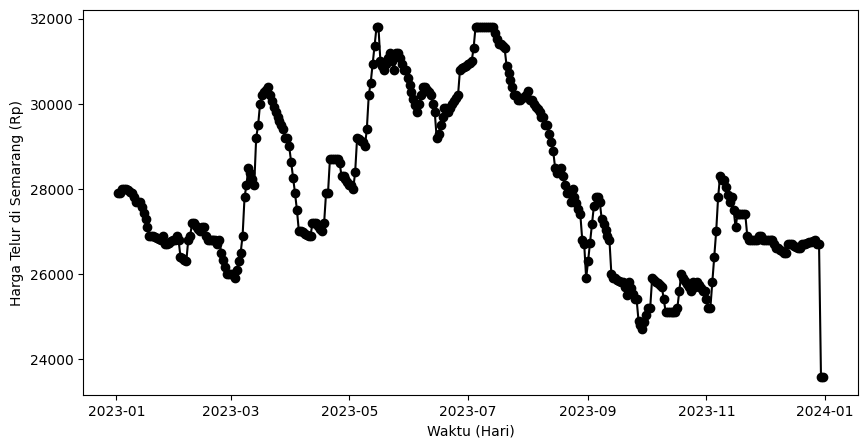

In [14]:
# Tampilkan informasi dataset
print("Informasi dataset:")
print(df.info())


#menampilkan plot deret waktu
plt.figure(figsize=(10,5))
plt.plot(df.index, df.semarang,'-ok')
plt.xlabel('Waktu (Hari)'), plt.ylabel('Harga Telur di Semarang (Rp)')
plt.show()

Gambar tersebut menunjukkan tren harga telur di Semarang selama periode satu tahun, dengan fluktuasi yang cukup signifikan. Terlihat adanya pola naik dan turun yang berulang, dengan lonjakan harga yang cukup tajam di pertengahan tahun dan penurunan yang lebih jelas menjelang akhir tahun. Dari segi kestasioneran, data ini terlihat tidak stasioner baik dalam rataan maupun ragam karena terdapat tren naik dan turun yang jelas, serta adanya variabilitas yang berubah seiring waktu. Insight yang dapat diambil adalah bahwa harga telur mengalami pola musiman atau dipengaruhi oleh faktor eksternal seperti permintaan pasar, kebijakan pemerintah, atau faktor produksi.

In [13]:
# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
           semarang
count    364.000000
mean   27998.644626
std     1909.367633
min    23572.071940
25%    26700.000000
50%    27550.000000
75%    29800.000000
max    31800.000000


Berdasarkan statistik deskriptif harga telur di Semarang selama satu tahun (364 hari), rata-rata harga telur adalah sekitar Rp27.999 dengan standar deviasi Rp1.909, menunjukkan adanya variasi harga yang cukup signifikan. Harga minimum yang tercatat adalah Rp23.572, sementara harga maksimum mencapai Rp31.800. Nilai kuartil menunjukkan bahwa 25% harga berada di bawah Rp26.700, 50% (median) berada di Rp27.550, dan 75% harga berada di bawah Rp29.800, mengindikasikan distribusi data yang sedikit condong ke arah harga yang lebih tinggi. Variasi harga yang cukup besar dapat mengindikasikan adanya faktor musiman, perubahan permintaan, atau kondisi pasar yang mempengaruhi fluktuasi harga sepanjang tahun.

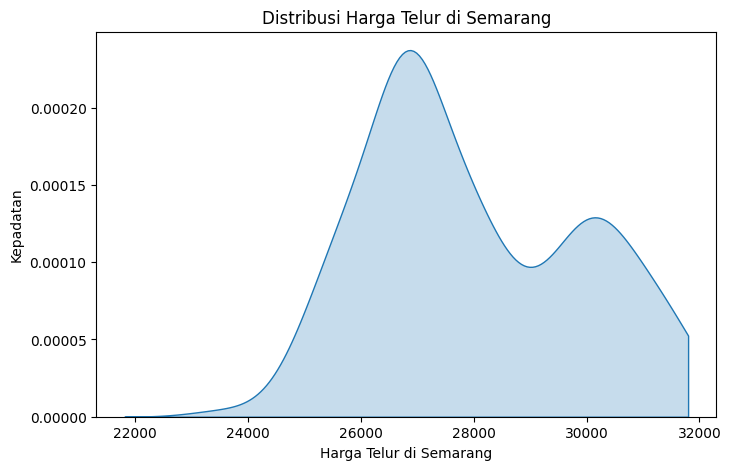

In [16]:

# Asumsi 'data_positif' sudah tidak mengandung nilai negatif
data_positif = df[df['semarang'] > 0]

# Menggunakan clip untuk membatasi rentang KDE
plt.figure(figsize=(8, 5))
sns.kdeplot(data_positif['semarang'], shade=True, clip=(0, max(data_positif['semarang'])))
plt.xlabel('Harga Telur di Semarang')  # Label sumbu x dalam bahasa Indonesia
plt.ylabel('Kepadatan')        # Label sumbu y dalam bahasa Indonesia
plt.title('Distribusi Harga Telur di Semarang')  # Judul plot dalam bahasa Indonesia
plt.show()

Grafik distribusi harga telur di Semarang menunjukkan pola distribusi yang tidak simetris, dengan puncak kepadatan tertinggi berada di sekitar harga Rp27.000-Rp28.000. Distribusi ini tampak memiliki skewness positif, di mana terdapat ekor yang lebih panjang ke arah harga yang lebih tinggi, menunjukkan bahwa meskipun sebagian besar harga berkumpul di sekitar nilai tengah, ada beberapa periode dengan harga yang lebih tinggi hingga mencapai Rp31.800. Selain itu, terdapat indikasi distribusi bimodal dengan satu puncak sekunder di sekitar harga Rp30.000, yang dapat mengindikasikan adanya dua kondisi pasar yang berbeda dalam periode waktu tertentu. 

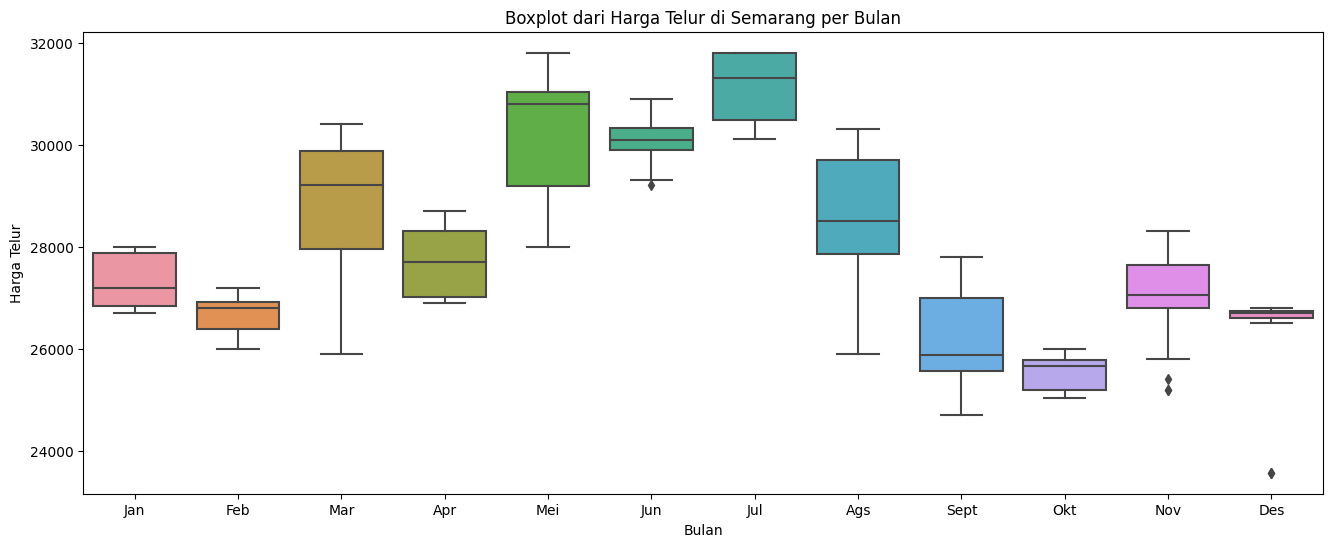

In [21]:
# 1. Pastikan kolom 'Date' dalam format datetime
df.index = pd.to_datetime(df.index)  

# 2. Ekstrak bulan dari indeks 'Date'
df['month'] = df.index.month  

# 3. Buat boxplot Close per bulan
plt.figure(figsize=(16, 6))
sns.boxplot(x='month', y='semarang', data=df)
plt.title('Boxplot dari Harga Telur di Semarang per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Harga Telur')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sept', 'Okt', 'Nov', 'Des'])
plt.show()

Boxplot harga telur di Semarang per bulan menunjukkan adanya fluktuasi harga yang cukup signifikan sepanjang tahun. Pada bulan-bulan seperti Maret, Mei, dan Juli, harga telur mencapai nilai yang lebih tinggi dibandingkan bulan lainnya, dengan rentang harga yang lebih besar, menunjukkan volatilitas yang tinggi. Sebaliknya, bulan seperti Februari, Oktober, dan Desember memiliki harga yang lebih stabil dengan rentang interkuartil yang lebih kecil, yang mengindikasikan sedikit variasi harga dalam periode tersebut. Hal ini dapat dikaitkan dengan faktor musiman, seperti peningkatan permintaan pada bulan-bulan tertentu yang menyebabkan lonjakan harga.  

Selain itu, terdapat beberapa outlier yang muncul di bulan November dan Desember, yang menunjukkan adanya fluktuasi ekstrem dalam harga telur di bulan tersebut. Misalnya, pada bulan Desember, terdapat harga yang jauh lebih rendah dibandingkan dengan nilai normal lainnya. Kemungkinan ini disebabkan oleh faktor eksternal seperti kebijakan pemerintah, distribusi stok telur, atau kejadian yang memengaruhi pasokan dan permintaan. Pola ini mengindikasikan bahwa meskipun ada tren umum dalam harga telur, terdapat kejadian khusus yang dapat menyebabkan perubahan harga secara tiba-tiba.  

Dari segi tren, terlihat bahwa harga telur cenderung lebih tinggi pada pertengahan tahun, terutama pada Mei hingga Juli, kemudian mengalami penurunan pada bulan-bulan berikutnya hingga akhir tahun. Hal ini bisa dikaitkan dengan periode panen, tingkat konsumsi masyarakat, serta hari besar keagamaan yang memengaruhi permintaan. Secara keseluruhan, analisis boxplot ini memberikan wawasan mengenai pola fluktuasi harga telur di Semarang, yang dapat digunakan sebagai dasar dalam perencanaan strategi harga dan pengelolaan pasokan untuk mencegah lonjakan harga yang ekstrem.

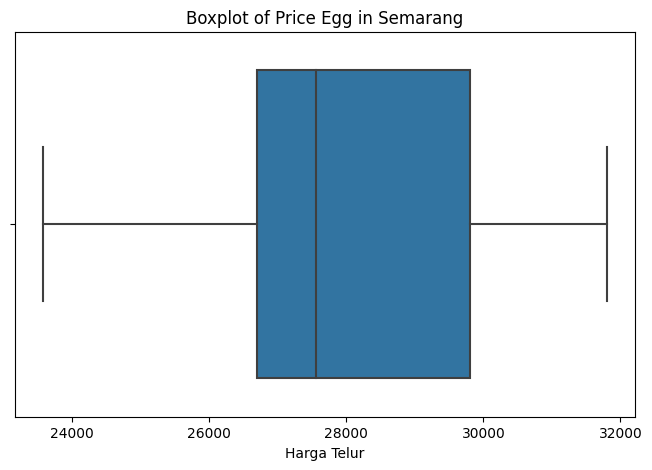

In [22]:
# Membuat boxplot untuk kolom 'semarang'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['semarang'])
plt.title('Boxplot of Price Egg in Semarang')
plt.xlabel('Harga Telur')
plt.show()

Boxplot ini menunjukkan distribusi harga telur di Semarang tanpa memisahkan berdasarkan bulan, melainkan sebagai keseluruhan data harga dalam satu periode tertentu. Median harga telur terlihat berada di sekitar 28.000, yang berarti separuh dari data harga berada di bawah dan separuh lainnya berada di atas nilai ini. Rentang interkuartil (IQR), yang ditunjukkan oleh kotak, cukup besar, mengindikasikan adanya variabilitas harga yang signifikan di tengah distribusi.  

Whiskers dalam boxplot ini menunjukkan sebaran harga minimum dan maksimum dalam rentang yang tidak dianggap sebagai outlier. Harga telur berkisar antara sekitar 23.500 hingga 32.000, menunjukkan fluktuasi yang cukup besar. Hal ini dapat mengindikasikan adanya faktor-faktor eksternal seperti perubahan pasokan dan permintaan yang menyebabkan harga berfluktuasi dalam rentang tersebut.  

Tidak adanya outlier yang terlihat dalam boxplot ini menunjukkan bahwa semua harga yang diamati masih berada dalam kisaran yang dianggap wajar berdasarkan distribusi data. Namun, perbedaan antara nilai minimum dan maksimum yang cukup besar menunjukkan bahwa harga telur tidak stabil dan bisa mengalami lonjakan atau penurunan dalam periode tertentu. 

In [23]:
# Menghitung IQR (Interquartile Range)
Q1 = df['semarang'].quantile(0.25)
Q3 = df['semarang'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai outlier
outliers = df[(df['semarang'] < lower_bound) | (df['semarang'] > upper_bound)]

# Menampilkan jumlah dan contoh outlier jika ada
if not outliers.empty:
    print(f"Ditemukan {len(outliers)} outlier dalam data harga penutupan BNI.")
    print(outliers.head())  # Menampilkan beberapa contoh outlier
else:
    print("Tidak ada outlier dalam data harga penutupan BNI.")

Tidak ada outlier dalam data harga penutupan BNI.


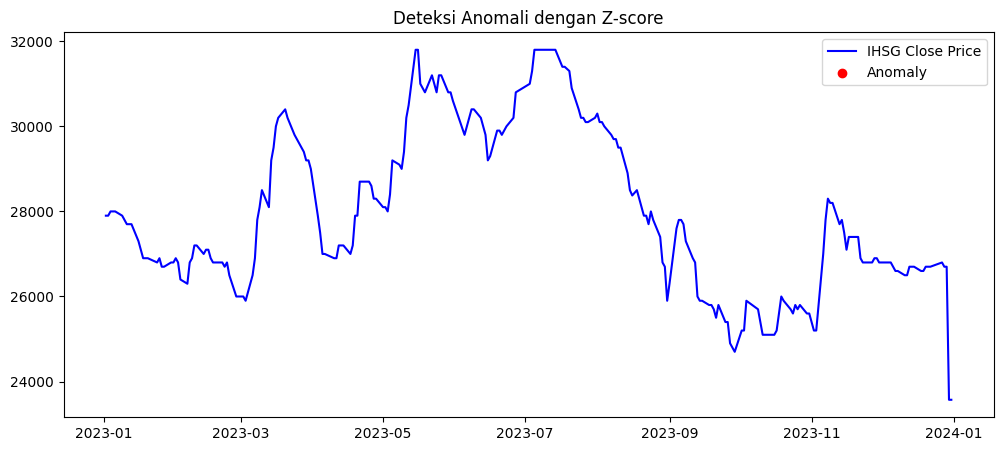

In [24]:
# DENGAN Z-SCORE
# Menghitung Z-score
df['Z-score'] = zscore(df['semarang'])

# Menentukan batas anomali (|Z| > 3 dianggap anomali)
df['Anomaly_Z'] = df['Z-score'].apply(lambda x: 1 if abs(x) > 3 else 0)

# Visualisasi hasil deteksi anomali
plt.figure(figsize=(12,5))
plt.plot(df['semarang'], label='IHSG Close Price', color='blue')
plt.scatter(df[df['Anomaly_Z'] == 1].index, df[df['Anomaly_Z'] == 1]['semarang'], color='red', label='Anomaly', marker='o')
plt.legend()
plt.title("Deteksi Anomali dengan Z-score")
plt.show()

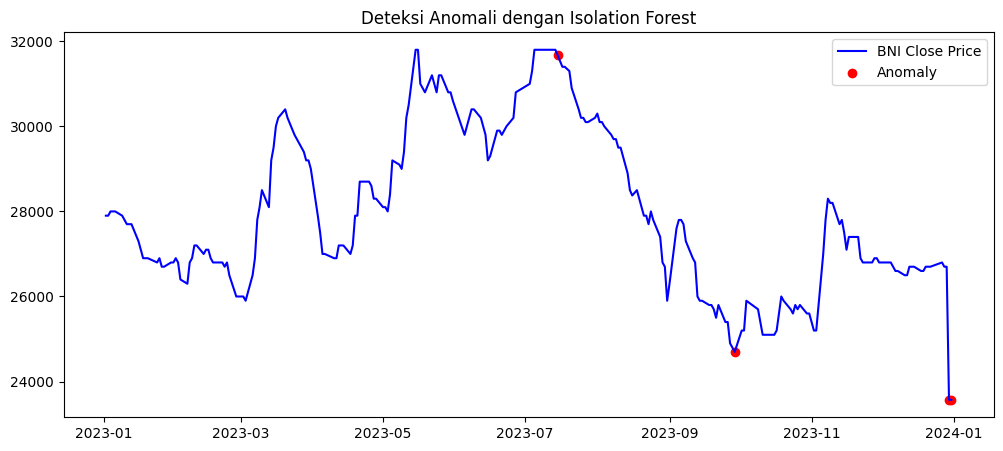

In [25]:
# DENGAN ISOLATION FOREST

# Inisialisasi model Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['Anomaly_IF'] = iso_forest.fit_predict(df[['semarang']])

# Visualisasi hasil deteksi anomali
plt.figure(figsize=(12,5))
plt.plot(df['semarang'], label='BNI Close Price', color='blue')
plt.scatter(df[df['Anomaly_IF'] == -1].index, df[df['Anomaly_IF'] == -1]['semarang'], color='red', label='Anomaly', marker='o')
plt.legend()
plt.title("Deteksi Anomali dengan Isolation Forest")
plt.show()


Grafik menunjukkan deteksi anomali pada harga penutupan saham BNI menggunakan metode **Isolation Forest**. Garis biru merepresentasikan pergerakan harga saham dari **Oktober hingga Desember 2022**, sementara titik merah menandai adanya **anomali** yang terdeteksi. Terlihat bahwa hanya ada satu titik anomali yang muncul sekitar pertengahan Oktober 2022, ketika harga saham mengalami penurunan tajam. Hal ini mengindikasikan bahwa pada tanggal tersebut terjadi pergerakan harga yang tidak biasa dibandingkan dengan pola historis lainnya. Isolation Forest mendeteksi anomali dengan cara mengisolasi sampel yang berbeda signifikan dari pola umum, sehingga titik anomali ini mungkin disebabkan oleh faktor eksternal seperti berita pasar, sentimen investor, atau kejadian ekonomi yang memengaruhi harga saham secara drastis.

In [26]:
ratio = df['semarang'].max() / df['semarang'].min()
print("Rasio Max/Min:", ratio)

Rasio Max/Min: 1.3490540874363206


Ketika melakukan dekoposisi deret, perlu diperhatikan bahwa terdapat 2 jenis model untuk dekomposisi, yaitu model Aditif dan multiplikatif.

- Model aditif digunakan jika ragam deret relatif konstan atau kecil
- Model multiplikatif digunakan jika ragam deret besar

Salah satu metode praktis adalah menghitung rasio antara nilai maksimum dan minimum harga.

- Jika rasio cukup kecil (misal, < 2 atau 3) → Model Aditif.
- Jika rasio besar (misal, > 3) → Model Multiplikatif.

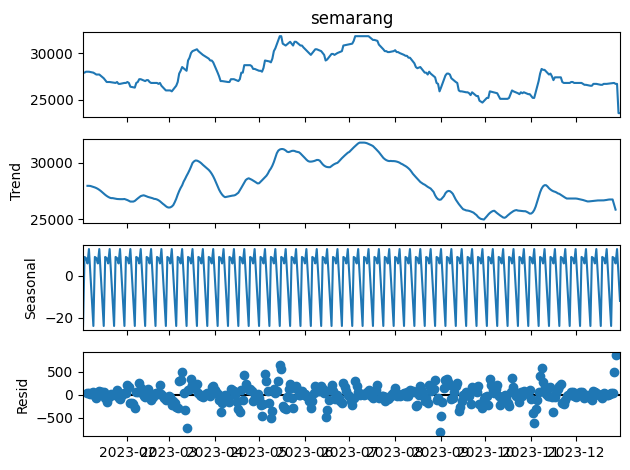

In [27]:
series = df.semarang
result = seasonal_decompose(series, model='additive',period=7) # The frequncy is dayly
figure = result.plot()

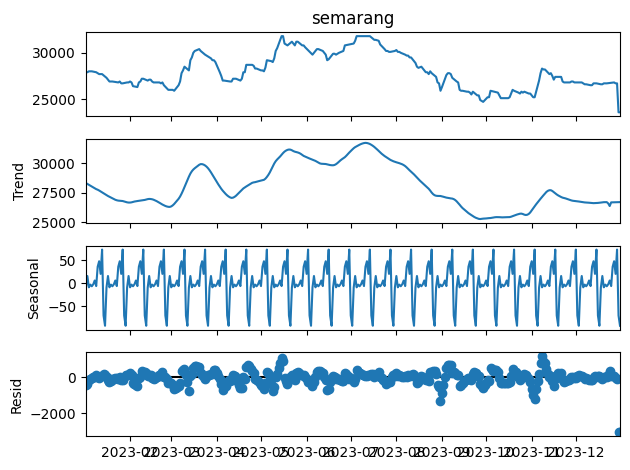

In [28]:
# Jika tetap ingin menggunakan periode 14, Anda bisa mencoba extrapolate_trend untuk mengisi nilai tren yang kurang:
result = seasonal_decompose(df['semarang'], model='additive', period=14, extrapolate_trend='freq')
result.plot()
plt.show()

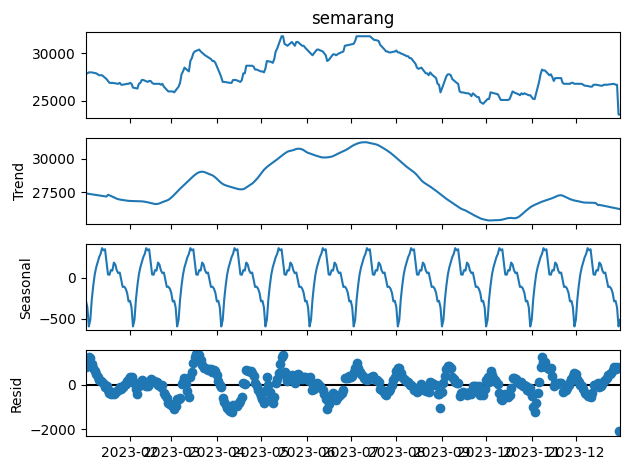

In [30]:
# Jika tetap ingin menggunakan periode 14, Anda bisa mencoba extrapolate_trend untuk mengisi nilai tren yang kurang:
result = seasonal_decompose(df['semarang'], model='additive', period=30, extrapolate_trend='freq')
result.plot()
plt.show()

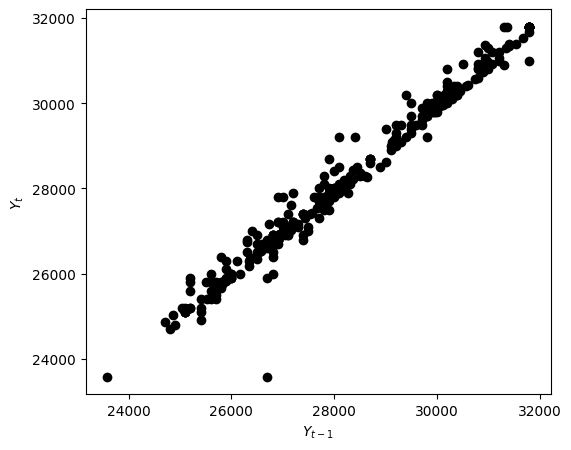

In [31]:
# menampilkan scatterplot antara Yt dan Yt-1
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df.semarang, lag=1, c='k')
plt.xlabel(r'$Y_{t-1}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

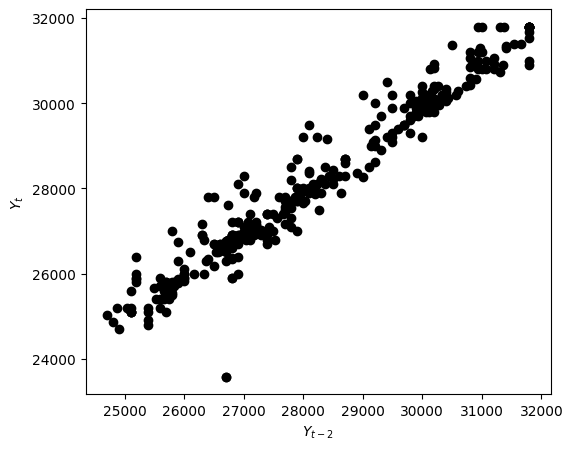

In [32]:
# menampilkan scatterplot antara Yt dan Yt-2
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df.semarang, lag=2, c='k')
plt.xlabel(r'$Y_{t-2}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

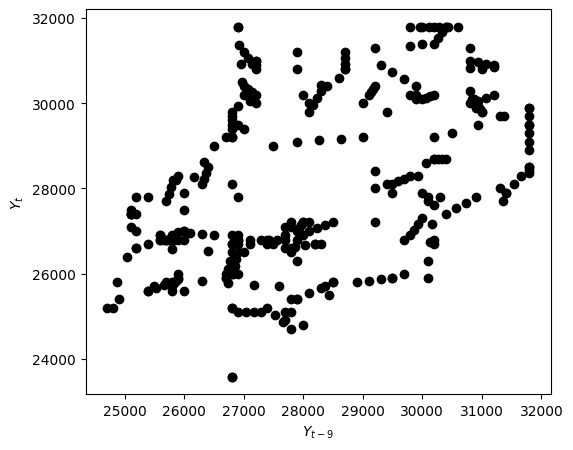

In [37]:
# menampilkan scatterplot antara Yt dan Yt-35
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df.semarang, lag=35, c='k')
plt.xlabel(r'$Y_{t-9}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Plot baru terlihat acak pada lag ke-35 yang menandakan bahwa sudah tidak terjadi autokorelasi

## Uji ACF Stationary Test / ADF (Augmented Dickey-Fuller) Test

Deret waktu dikatakan stasioner jika karakteristik statistiknya, seperti rata-rata, varians, dan autokorelasi, tetap konstan sepanjang waktu.  

**Stasioneritas kuat** mengacu pada proses stokastik di mana distribusi probabilitasnya tidak berubah meskipun mengalami pergeseran waktu, sehingga parameter seperti rata-rata dan varians tetap stabil. Sementara itu, **stasioneritas lemah** hanya mensyaratkan bahwa rata-rata, varians, dan autokorelasi tidak berubah seiring waktu.  

Stasioneritas sangat penting dalam analisis deret waktu karena data yang tidak stasioner memiliki ketergantungan waktu yang tinggi, sehingga mempersulit pemodelan. Salah satu metode untuk mengubah data non-stasioner menjadi stasioner adalah dengan melakukan diferensiasi menggunakan metode `diff()`.  

Sebelum menganalisis deret waktu, kita perlu menguji apakah data bersifat stasioner atau tidak. Salah satu uji statistik yang umum digunakan adalah **Uji Dickey-Fuller**, yang menentukan apakah ada akar unit dalam data. Hipotesis nol (H0) menyatakan bahwa deret memiliki akar unit (tidak stasioner), sedangkan hipotesis alternatif (H1) menyatakan bahwa deret tidak memiliki akar unit (stasioner). Jika hipotesis nol tidak dapat ditolak, maka deret waktu tersebut kemungkinan besar tidak stasioner. Jika rata-rata dan varians tetap konstan sepanjang waktu, maka deret waktu tersebut bersifat stasioner.

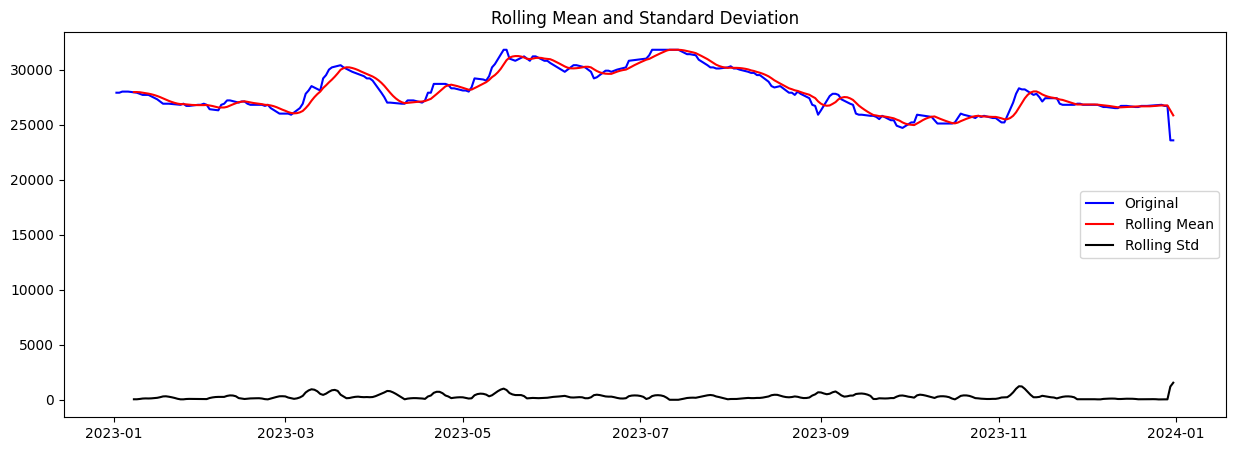

Results of dickey fuller test
Test Statistics                 -1.426241
p-value                          0.569633
No. of lags used                 2.000000
Number of observations used    361.000000
dtype: float64


In [38]:
#Test for staionarity
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(7).mean()
    rolstd = timeseries.rolling(7).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(rolmean,color='red',label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    print(output)

test_stationarity(df['semarang'])

Grafik menunjukkan pergerakan harga saham BNI beserta **rolling mean** (rata-rata bergerak) dan **rolling standard deviation** (deviasi standar bergerak) untuk mengamati kestabilan data dalam periode waktu tertentu. Rolling mean (garis merah) mengikuti tren data asli (garis biru), menunjukkan adanya pola yang cenderung meningkat dengan sedikit fluktuasi. Hasil **Uji Augmented Dickey-Fuller (ADF)** menunjukkan bahwa **statistik uji sebesar -1.512** dengan **p-value 0.527**, yang lebih besar dari tingkat signifikansi umum (0.05). Hal ini mengindikasikan bahwa data **tidak stasioner**, sehingga perlu dilakukan transformasi seperti differencing atau detrending untuk membuatnya stasioner sebelum dapat digunakan dalam pemodelan time series seperti ARIMA atau SARIMA.

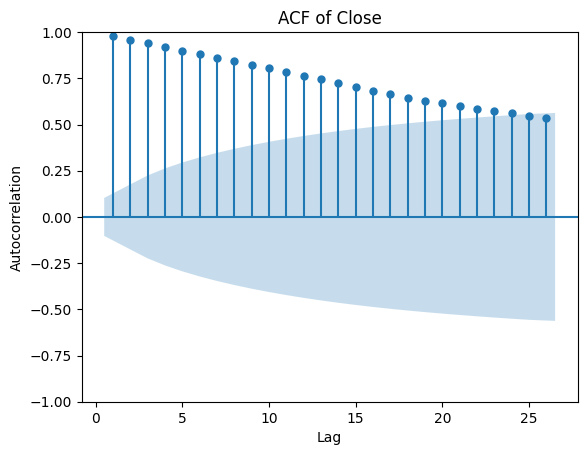

In [39]:
# Assuming 'rr' is your DataFrame and 'berat' is the column of interest
plot_acf(np.array(df.semarang), zero=False)
plt.title('ACF of Close')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

Plot ACF dari data **Close** menunjukkan bahwa nilai autokorelasi masih cukup tinggi pada beberapa lag pertama dan menurun secara perlahan, yang mengindikasikan adanya tren dalam data. Tidak adanya cutoff yang jelas dalam ACF, melainkan pola **eksponensial decay (peluruhan eksponensial)**, merupakan karakteristik dari proses **Autoregressive (AR)**. Hal ini menunjukkan bahwa model **ARIMA dengan komponen AR(p) lebih dominan** dibandingkan MA(q). Untuk memastikan model yang sesuai, perlu dilakukan analisis lebih lanjut dengan melihat PACF dan uji stasioneritas data. Jika data masih non-stasioner, differencing mungkin diperlukan sebelum menentukan model yang optimal.

### Tahap Differencing

In [40]:
df['Stocks First Difference']=df['semarang']-df['semarang'].shift(1)

In [41]:
adft = adfuller(df['Stocks First Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output)

Test Statistics               -8.410020e+00
p-value                        2.116188e-13
No. of lags used               1.000000e+00
Number of observations used    3.610000e+02
dtype: float64


Hasil **Uji Augmented Dickey-Fuller (ADF)** menunjukkan bahwa statistik uji sebesar **-9.807** dengan **p-value 5.80 × 10⁻¹⁷**, yang jauh lebih kecil dari tingkat signifikansi umum (0.05). Ini berarti kita dapat **menolak hipotesis nol (H₀)** yang menyatakan bahwa data memiliki unit root atau tidak stasioner. Dengan demikian, data ini **sudah stasioner**, yang berarti fluktuasi rata-rata dan variansnya stabil sepanjang waktu. Data yang stasioner seperti ini cocok untuk digunakan dalam pemodelan time series seperti ARIMA tanpa perlu transformasi tambahan seperti differencing.

Text(0.5, 1.0, 'Plot Close Setelah Differencing 1')

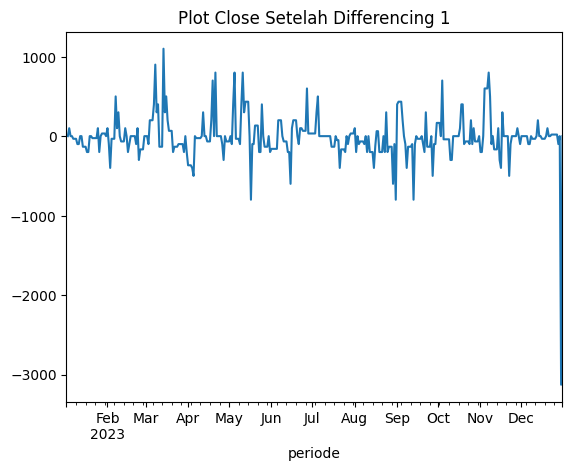

In [42]:
df['Stocks First Difference'].plot()
plt.title('Plot Close Setelah Differencing 1')

Grafik tersebut menunjukkan **plot harga penutupan saham setelah dilakukan differencing pertama** (d = 1). Differencing ini dilakukan untuk menghilangkan tren dan membuat data menjadi stasioner. Dari grafik, terlihat bahwa fluktuasi nilai kini berosilasi di sekitar nol, yang menandakan bahwa tren jangka panjang telah dihilangkan. Meskipun masih terdapat volatilitas tinggi dengan lonjakan dan penurunan tajam, pola ini lebih cocok untuk diterapkan dalam model time series seperti **ARIMA**, yang memerlukan data stasioner untuk menghasilkan prediksi yang lebih akurat.

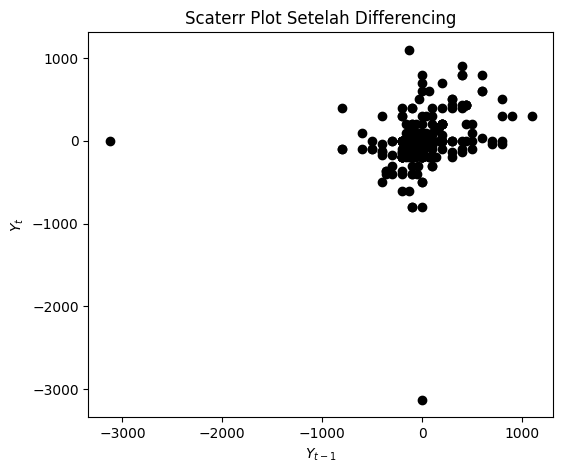

In [43]:
# menampilkan scatterplot antara Yt dan Yt-1
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df['Stocks First Difference'], lag=1, c='k')
plt.xlabel(r'$Y_{t-1}$'),plt.ylabel(r'$Y_{t}$')
plt.title('Scaterr Plot Setelah Differencing')
plt.show()

Scatter plot setelah differencing ini menunjukkan bahwa hubungan antara \( Y_t \) dan \( Y_{t-1} \) menjadi lebih acak dibandingkan sebelum differencing. Hal ini mengindikasikan bahwa tren atau pola autokorelasi yang sebelumnya ada telah berkurang atau hilang, yang merupakan indikasi bahwa data sudah lebih mendekati stasioner. Jika titik-titik tersebar secara acak tanpa pola yang jelas, maka differencing berhasil dalam menghilangkan tren dan menjadikan data lebih sesuai untuk pemodelan time series seperti ARIMA. Namun, jika masih terlihat pola tertentu, mungkin diperlukan differencing tambahan atau pendekatan lain untuk mencapai stasioneritas penuh.

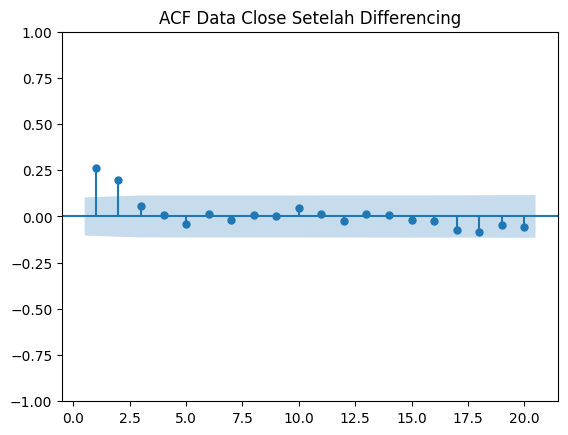

In [44]:
plot_acf(df['Stocks First Difference'].dropna(), lags=20, zero=False)  # Menampilkan ACF hingga lag 20
plt.title('ACF Data Close Setelah Differencing')
plt.show()

Grafik Autocorrelation Function (ACF) menunjukkan bagaimana data setelah differencing berkorelasi dengan lag sebelumnya. Dari hasil plot, sebagian besar nilai ACF berada dalam batas konfidensi, yang menunjukkan bahwa data sudah cukup bersifat white noise dan tidak memiliki pola autokorelasi yang signifikan. Namun, jika ada lag yang masih signifikan, hal ini menunjukkan adanya keterkaitan data dengan beberapa periode sebelumnya, yang bisa dipertimbangkan dalam pemodelan ARIMA.

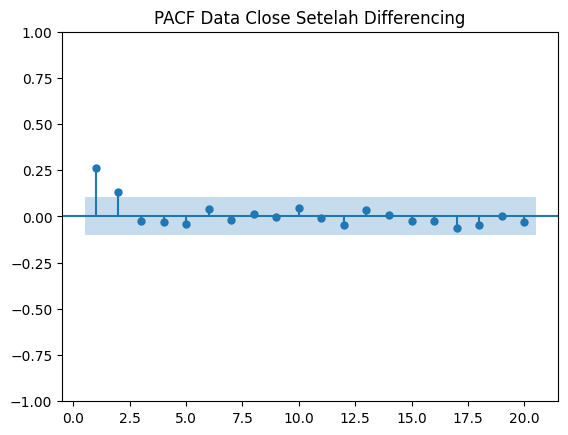

In [45]:
plot_pacf(df['Stocks First Difference'].dropna(), lags=20, zero=False) # Menampilkan PACF hingga lag 20
plt.title('PACF Data Close Setelah Differencing')
plt.show()

Grafik Partial Autocorrelation Function (PACF) memperlihatkan bahwa hanya lag awal yang signifikan, sedangkan lag berikutnya cenderung berada dalam batas konfidensi. Ini mengindikasikan bahwa model autoregresif (AR) dengan orde kecil mungkin cukup untuk menangkap hubungan dalam data setelah differencing. Berdasarkan plot PACF ini, kita bisa mempertimbangkan penggunaan model ARIMA dengan parameter AR yang rendah.

Berdasarkan analisis plot **ACF** dan **PACF** setelah differencing, kita bisa menentukan model ARIMA yang sesuai:  

1. **ACF (Autocorrelation Function)**:  
   - ACF menunjukkan bahwa setelah lag awal, nilai korelasi cepat menurun dan sebagian besar lag tidak signifikan.  
   - Ini mengindikasikan bahwa data tidak memiliki pola MA (Moving Average) yang kuat.  

2. **PACF (Partial Autocorrelation Function)**:  
   - PACF menunjukkan cutoff yang jelas pada lag awal, yang berarti ada efek autoregresif (AR).  
   - Hanya beberapa lag pertama yang signifikan, mengindikasikan bahwa model AR mungkin berorde rendah.  

### Rekomendasi Model ARIMA:  
- Dari plot **PACF** yang menunjukkan cutoff pada lag awal, model ini kemungkinan memiliki **komponen AR (p) yang rendah**.  
- Dari **ACF** yang tidak menunjukkan pola yang jelas, kemungkinan **komponen MA (q) kecil atau bahkan nol**.  
- Karena sudah dilakukan differencing sekali, maka **d = 1**.  

**Model yang direkomendasikan**:  
- Jika PACF cutoff pada **lag 1**, gunakan **ARIMA(1,1,0)** → Model dengan 1 lag autoregressive.  
- Jika PACF cutoff pada **lag 2**, gunakan **ARIMA(2,1,0)** → Model dengan 2 lag autoregressive.  
- Jika masih ada sedikit pola pada ACF, bisa dicoba **ARIMA(1,1,1)** atau **ARIMA(2,1,1)**.  

Untuk memastikan model terbaik, sebaiknya dilakukan **uji Akaike Information Criterion (AIC)** atau **Bayesian Information Criterion (BIC)** serta pengecekan residual model setelah pemodelan dilakukan.

In [46]:
# Definisikan rentang p, d, q
p = range(0, 4)  # Coba 0 sampai 3
d = range(1, 2)  # Coba 0 atau 1 (karena sudah diferensiasi)
q = range(0, 4)  # Coba 0 sampai 3

# Buat kombinasi grid search
pdq = list(itertools.product(p, d, q))

# Simpan hasil AIC
best_aic = float("inf")
best_pdq = None
results = []

# Looping mencari kombinasi terbaik
for param in pdq:
    try:
        model = ARIMA(df['Stocks First Difference'].dropna(), order=param)
        model_fit = model.fit()
        aic = model_fit.aic
        results.append((param, aic))
        if aic < best_aic:
            best_aic = aic
            best_pdq = param
    except:
        continue

# Konversi ke DataFrame
results_df = pd.DataFrame(results, columns=["(p,d,q)", "AIC"]).sort_values(by="AIC")

# Menampilkan hasil terbaik
print(f"Best ARIMA Order: {best_pdq} with AIC: {best_aic}")
print(results_df.head())  # Menampilkan 5 kombinasi terbaik


Best ARIMA Order: (2, 1, 1) with AIC: 5096.006365245953
      (p,d,q)          AIC
9   (2, 1, 1)  5096.006365
7   (1, 1, 3)  5096.294025
3   (0, 1, 3)  5096.407838
13  (3, 1, 1)  5097.129578
10  (2, 1, 2)  5097.379865


Model ARIMA(1,1,1) memberikan AIC terendah

In [47]:
# Membuat model ARIMA(2, 1, 1)
model = ARIMA(df['Stocks First Difference'].dropna(), order=(2, 1, 1))
model_fit = model.fit()

# Menampilkan ringkasan model
print(model_fit.summary())

                                  SARIMAX Results                                  
Dep. Variable:     Stocks First Difference   No. Observations:                  363
Model:                      ARIMA(2, 1, 1)   Log Likelihood               -2544.003
Date:                     Sun, 02 Mar 2025   AIC                           5096.006
Time:                             00:46:25   BIC                           5111.573
Sample:                         01-03-2023   HQIC                          5102.195
                              - 12-31-2023                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2114      0.037      5.785      0.000       0.140       0.283
ar.L2          0.2119      0.062      3.429      0.001       0.091       0.333
ma.L1       

Maasih ada autokorelasi karena Prob(Q) = 0.02 < 0,05

In [48]:
# Membuat model ARIMA(2, 1, 2)
model = ARIMA(df['Stocks First Difference'].dropna(), order=(2, 1, 2))
model_fit = model.fit()

# Menampilkan ringkasan model
print(model_fit.summary())

                                  SARIMAX Results                                  
Dep. Variable:     Stocks First Difference   No. Observations:                  363
Model:                      ARIMA(2, 1, 2)   Log Likelihood               -2543.690
Date:                     Sun, 02 Mar 2025   AIC                           5097.380
Time:                             00:47:29   BIC                           5116.838
Sample:                         01-03-2023   HQIC                          5105.115
                              - 12-31-2023                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0001      0.404     -0.000      1.000      -0.791       0.791
ar.L2          0.2744      0.133      2.067      0.039       0.014       0.535
ma.L1       

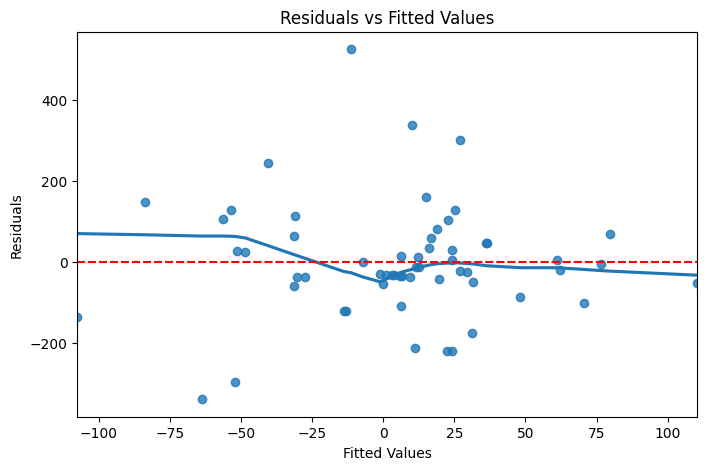

In [137]:
# Plot Residuals vs. Fitted Values
plt.figure(figsize=(8, 5))
sns.residplot(x=model_fit.fittedvalues, y=model_fit.resid, lowess=True)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


Grafik **Residuals vs Fitted Values** menunjukkan adanya pola non-acak dalam residual, yang mengindikasikan kemungkinan **heteroskedastisitas** atau hubungan non-linear yang tidak sepenuhnya ditangkap oleh model. Beberapa residual ekstrem menunjukkan adanya **outlier**, yang dapat mempengaruhi keakuratan model. Selain itu, garis tren biru yang sedikit melengkung menandakan bahwa asumsi regresi linier mungkin tidak sepenuhnya terpenuhi, sehingga diperlukan pendekatan lain seperti transformasi data atau model yang lebih kompleks untuk meningkatkan akurasi prediksi.

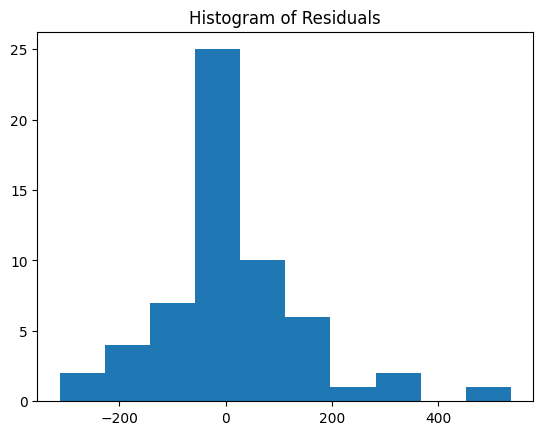

In [138]:
# Mendapatkan residual
residuals = model_fit.resid

# Plot histogram residual
plt.hist(residuals)
plt.title('Histogram of Residuals')
plt.show()

Histogram residual menunjukkan distribusi yang **tidak sepenuhnya simetris** dengan kecenderungan sedikit ke kanan, yang mengindikasikan bahwa residual mungkin tidak mengikuti distribusi normal secara sempurna. Terdapat beberapa nilai ekstrem di sisi kanan yang menunjukkan adanya **outlier positif**, yang dapat mempengaruhi performa model regresi. Selain itu, puncak distribusi berada di sekitar nol, yang merupakan indikasi bahwa sebagian besar residual kecil, tetapi penyebarannya masih cukup lebar. Jika asumsi normalitas residual diperlukan dalam model ini, mungkin perlu dilakukan uji statistik seperti **Kolmogorov-Smirnov atau Shapiro-Wilk** untuk memastikan normalitas, atau mempertimbangkan transformasi data untuk meningkatkan kesesuaian model.

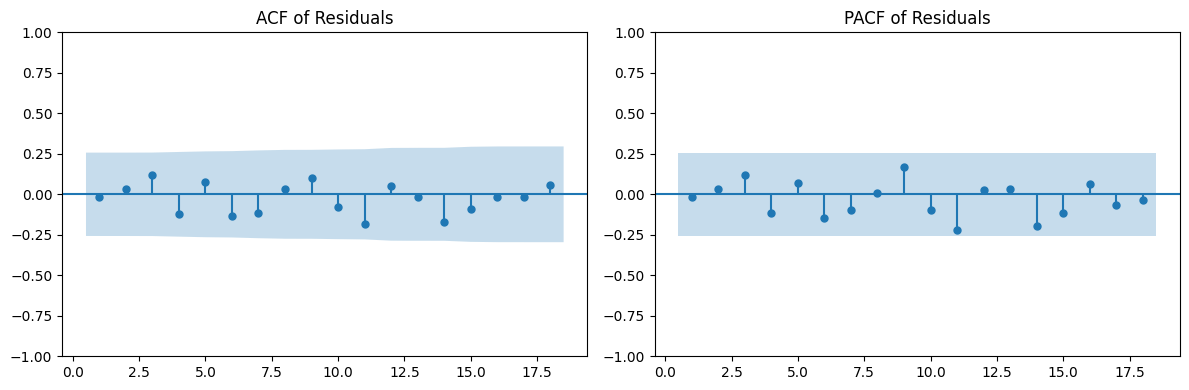

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot ACF residual
plot_acf(residuals, ax=axes[0], zero=False)
axes[0].set_title('ACF of Residuals')

# Plot PACF residual
plot_pacf(residuals, ax=axes[1], zero=False)
axes[1].set_title('PACF of Residuals')

plt.tight_layout()
plt.show()



Grafik **ACF (Autocorrelation Function) dan PACF (Partial Autocorrelation Function) dari residual** menunjukkan bahwa sebagian besar lag berada dalam batas kepercayaan (zona biru), yang mengindikasikan bahwa residual tidak memiliki autokorelasi yang signifikan. Ini berarti bahwa model yang digunakan sudah cukup baik dalam menangkap pola dalam data, dan tidak ada hubungan sistematis yang tersisa dalam residual. Namun, jika terdapat beberapa titik yang keluar dari batas kepercayaan, ini dapat menunjukkan adanya pola yang belum sepenuhnya dimodelkan, sehingga mungkin perlu mempertimbangkan model yang lebih kompleks atau menambahkan variabel tambahan untuk meningkatkan performa model.

In [140]:
# Membuat variabel eksogen dengan konstanta
exog = sm.add_constant(np.arange(len(model_fit.resid)))  # Menambahkan konstanta ke indeks waktu

# Melakukan uji Breusch-Pagan
bp_test = het_breuschpagan(model_fit.resid, exog)

# Menampilkan hasil
print('Breusch-Pagan test p-value:', bp_test[1])

Breusch-Pagan test p-value: 0.5808032285324337


Hasil uji Breusch-Pagan menunjukkan p-value sebesar **0.5808**, yang lebih besar dari **0.05**, sehingga tidak ada cukup bukti untuk menolak hipotesis nol (**H₀**), yaitu bahwa residual model tidak mengandung heteroskedastisitas. Ini menunjukkan bahwa variabilitas residual relatif konstan, sehingga asumsi homoskedastisitas terpenuhi. Dengan demikian, model ARIMA yang digunakan dapat dianggap valid dalam hal kestabilan varians residual, dan analisis atau prediksi selanjutnya dapat dilakukan tanpa perlu koreksi terhadap heteroskedastisitas.

In [98]:
#cek autokorelasi resiudal
lags = range(1, 21)  # Menguji lag 1 hingga 20
lb_test = acorr_ljungbox(residuals, lags=lags)
print(lb_test)

      lb_stat  lb_pvalue
1    0.015224   0.901801
2    0.091676   0.955197
3    1.010197   0.798785
4    1.920289   0.750417
5    2.325576   0.802503
6    3.574220   0.734070
7    4.475755   0.723635
8    4.545573   0.804857
9    5.240105   0.812895
10   5.676801   0.841647
11   8.208614   0.694504
12   8.400037   0.753140
13   8.416668   0.815436
14  10.699939   0.709431
15  11.375282   0.725566
16  11.405757   0.783775
17  11.438270   0.832895
18  11.736833   0.860522
19  13.278869   0.823994
20  14.186633   0.820908


In [150]:
# Membuat model ARIMA(2, 1, 1)
model = ARIMA(df['Stocks First Difference'].dropna(), order=(2, 1, 2))
model_fit = model.fit()

# Menampilkan ringkasan model
print(model_fit.summary())

                                  SARIMAX Results                                  
Dep. Variable:     Stocks First Difference   No. Observations:                   58
Model:                      ARIMA(2, 1, 2)   Log Likelihood                -363.565
Date:                     Mon, 17 Feb 2025   AIC                            737.131
Time:                             01:57:53   BIC                            747.346
Sample:                         10-04-2022   HQIC                           741.101
                              - 12-22-2022                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2032      0.202     -5.958      0.000      -1.599      -0.807
ar.L2         -0.3288      0.168     -1.954      0.051      -0.658       0.001
ma.L1       

Hasil estimasi model **SARIMAX(2,1,2)** menunjukkan bahwa koefisien AR(1) signifikan secara statistik dengan nilai **-1.2032 (p < 0.01)**, sementara AR(2) memiliki signifikansi marginal dengan p-value **0.051**. Koefisien MA(1) dan MA(2) tidak signifikan dengan p-value mendekati **1.000**, menunjukkan bahwa komponen moving average mungkin tidak terlalu berkontribusi dalam model. Nilai **AIC (737.131) dan BIC (747.346)** menunjukkan kompleksitas model, dan **uji Ljung-Box (Q=0.02, p=0.90)** mengindikasikan tidak adanya autokorelasi yang signifikan dalam residual. Namun, **uji Jarque-Bera (JB=12.18, p=0.00)** menunjukkan bahwa residual tidak berdistribusi normal karena adanya skewness (0.72) dan kurtosis tinggi (4.75), yang dapat memengaruhi kualitas inferensi model. Oleh karena itu, meskipun model cukup menangkap pola dalam data, distribusi residual yang tidak normal dan parameter MA yang tidak signifikan mengindikasikan bahwa model ini mungkin masih dapat ditingkatkan dengan pendekatan lain atau modifikasi parameter.